# Homework 05
## Logistic Regression for a binary classification

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import numpy as np

## 1. Training Data
### Loading the training data file('data.txt')

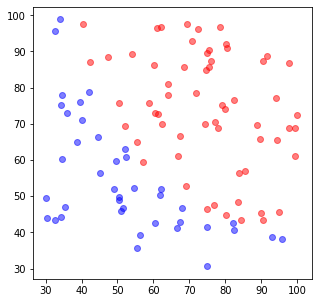

In [2]:
data = np.genfromtxt("data.txt", delimiter=',')

x, y, label = data[:, 0], data[:, 1], data[:, 2]

x_label0, y_label0 = x[label == 0], y[label == 0]
x_label1, y_label1 = x[label == 1], y[label == 1]

Data0, Data1 = [], []
Label0, Label1 = [], []

dataset = np.ones((np.shape(label)[0], 1))
dataset = np.concatenate((dataset, data[:,0:2]),axis=1)
label = np.matrix(label)
label = np.reshape(label,(-1, 1))

for idx in range(len(x_label0)):
    Data0.append([1.0, x_label0[idx], y_label0[idx]])

for idx in range(len(x_label1)):
    Data1.append([1.0, x_label1[idx], y_label1[idx]])

Data0, Data1 = np.matrix(Data0), np.matrix(Data1)

plt.figure(figsize=(5, 5))
plt.scatter(x_label0, y_label0, alpha=0.5, c='blue')
plt.scatter(x_label1, y_label1, alpha=0.5, c='red')
plt.show()


## 2. Logistic regression
### Linear model
* $z = \theta_0 + \theta_1 x + \theta_2 y$
### Logistic sigmoid function
* $\sigma(z) = \frac{1}{1+\exp(-z)}$
### Derivative of logistic sigmoid function
* $\sigma^{'}(z) = \sigma(z) (1-\sigma(z))$


In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-1.0 * z))

## 3. Objective function
$$J(\theta_0, \theta_1, \theta_2) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(z^{(i)})) - (1 - l^{(i)}) \log(1 - \sigma(z^{(i)}))  )$$

In [4]:
def loss(z, l):
    m = np.shape(z)[0]
    left_term = np.multiply((-1.0 * l), np.log(sigmoid(z)))
    right_term = np.multiply((1.0 - l), np.log(1.0 - sigmoid(z)))
    return (1.0 / m) * np.sum(left_term - right_term)

## 4. Gradient Descent
- $\theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)})$
- $\theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) x^{(i)}$
- $\theta_2^{(t+1)} := \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) y^{(i)}$

In [5]:
def gradient(theta, data, l):
    grad = []
    m = np.shape(l)[0]
    z = np.matmul(data, theta)

    for idx in range(3):
        grad.append((1.0/m) * np.sum((sigmoid(z) - l) * data[:,idx]))

    grad = np.matrix(grad)
    return np.reshape(grad, (3, 1))

def gradDescent(thetas, datas, l, lr):
    gradients = gradient(thetas, datas, l)
    return thetas - lr * gradients

## 5. Training

In [6]:
theta = np.matrix([[0.0],[0.0],[0.0]])
learning_rate = 0.000001

theta0_record = []
theta1_record = []
theta2_record = []

'''
# --------------------------------------------------

losses = [10.0]
iter = 0
while losses[-1] != loss(np.matmul(dataset,theta), label):
    losses.append(loss(np.matmul(dataset,theta), label))
    
    grad = []
    m = np.shape(label)[0]
    z = np.matmul(dataset, theta)

    for idx in range(3):
        grad.append((1.0/m) * np.sum((sigmoid(z) - label) * dataset[:,idx]))
    grad = np.matrix(grad).reshape((3,1))

    theta = theta - 1.0 * learning_rate * grad 

    print(theta.reshape(1, 3))

    theta0_record.append(theta[0].tolist()[0][0])
    theta1_record.append(theta[1].tolist()[0][0])
    theta2_record.append(theta[2].tolist()[0][0])
    iter = iter + 1
_ = losses.pop(0)

print(theta)

# -----------------------------------------------
'''
losses = [10.0]
iter = 0
while losses[-1] != loss(np.matmul(dataset,theta), label):
    losses.append(loss(np.matmul(dataset,theta), label))
    theta = gradDescent(theta, dataset, label, learning_rate)
    theta0_record.append(theta.item(0))
    theta1_record.append(theta.item(1))
    theta2_record.append(theta.item(2))
    iter = iter + 1
_ = losses.pop(0)


## 6. Visualize Classifier

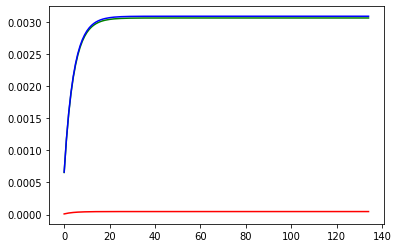

In [7]:
iter_x = list(range(iter))

plt.plot(iter_x, theta0_record, color='red')
plt.plot(iter_x, theta1_record, color='green')
plt.plot(iter_x, theta2_record, color='blue')

plt.show()

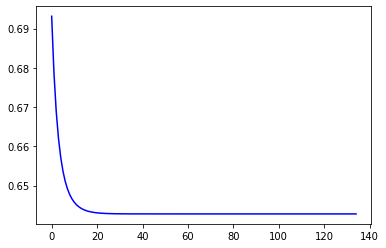

In [8]:
plt.plot(iter_x, losses, color='blue')

plt.show()

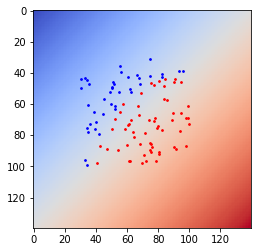

In [9]:
_x = np.arange(30, 100, 0.5)
_y = np.arange(30, 100, 0.5)

_x, _y = np.meshgrid(_x, _y)

_one = np.ones(_x.shape)

_z = theta[0].item(0) * _one  + theta[1].item(0) * _x + theta[2].item(0) * _y
'''
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(_x, _y, _z, cmap=cm.coolwarm, alpha=1.0)
ax.scatter3D(x_label0, y_label0, 0, 'blue')
ax.scatter3D(x_label1, y_label1, 1, 'red')
'''

plt.imshow(_z,cm.coolwarm,alpha=1.0)

plt.scatter(x_label0, y_label0, alpha=1, c='blue', s=3)
plt.scatter(x_label1, y_label1, alpha=1, c='red', s=3)

plt.show()